Lambda School Data Science

*Unit 4, Sprint 1, Module 3*

---

# Document Classification (Assignment)

This notebook is for you to practice skills during lecture.

Today's guided module project and assignment will be different. You already know how to do classification. You ready know how to extract features from documents. So? That means you're ready to combine and practice those skills in a kaggle competition. We we will open with a five minute sprint explaining the competition, and then give you 25 minutes to work. After those twenty five minutes are up, I will give a 5-minute demo an NLP technique that will help you with document classification (*and **maybe** the competition*).

Today's all about having fun and practicing your skills.

## Sections
* <a href="#p1">Part 1</a>: Text Feature Extraction & Classification Pipelines
* <a href="#p2">Part 2</a>: Latent Semantic Indexing
* <a href="#p3">Part 3</a>: Word Embeddings with Spacy
* <a href="#p4">Part 4</a>: Post Lecture Assignment

# Text Feature Extraction & Classification Pipelines (Learn)
<a id="p1"></a>

## Follow Along 

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model (try using the pipe method I just demoed)

### Load Competition Data

In [80]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import pandas as pd
import eli5
import re
import spacy

In [2]:
# You may need to change the path
train = pd.read_csv('./whiskey-reviews-dspt9/train.csv')
test = pd.read_csv('./whiskey-reviews-dspt9/test.csv')

In [68]:
train.head()
doc = 'This is a rare single barrel, non-chill filtered release. Straight wheat whiskeys can be almost too easy-going. Not chill-filtering adds teasing, subtle complexity. Gently sweet, with maple syrup, caramel, marzipan, and coconut cream, along with a dusting of vanilla, cinnamon, and green tea. A whiskey for a lazy Saturday afternoon...or perhaps with pancakes at brunch? (Julio’s Liquors exclusive)'
print(re.sub('[()]', '', doc))

This is a rare single barrel, non-chill filtered release. Straight wheat whiskeys can be almost too easy-going. Not chill-filtering adds teasing, subtle complexity. Gently sweet, with maple syrup, caramel, marzipan, and coconut cream, along with a dusting of vanilla, cinnamon, and green tea. A whiskey for a lazy Saturday afternoon...or perhaps with pancakes at brunch? Julio’s Liquors exclusive


In [173]:
pd.options.display.max_colwidth = 500
train['description'][90]

'A simple, straightforward session whisky. True North is rich in the classic caramel notes and searing pepper so coveted by shooters and tailgaters. Ginger and white pepper last seemingly forever. Given its undeniable drinkability, packaging in a plastic bottle is probably a good idea. You can sip this if you wish, but with ginger ale and a dash of bitters it becomes a Canadian Saturday night in a glass. A classic Canadian bottom-shelfer. Canada only'

In [113]:
nlp = spacy.load("en_core_web_md")

In [118]:
# get rid of any numbers, that are not followed by 
# years, year, month, months
# age, aged, vintage, anniversary, bottles
# bottled ...

follow_num = nlp.pipe(['year', 'month', 'age', 'bottle', 'anniversary', 'vintage', 'mature', 'rye'])
follow_num = [token.lemma_ for doc in follow_num for token in doc] 

In [166]:
def remove_nums(text):
    """Removes 
    """   text_list = text.split()
    for i in range(0,len(text_list) - 3):
        if text_list[i].isdigit():
            next_words_lemma = [token.lemma_ for token in nlp(text_list[i+1])][0]
            if next_words_lemma not in follow_num:
                text_list.remove(text_list[i])
    text = ' '.join(text_list)
    return text

In [175]:
train['description'] = train['description'].apply(lambda x: remove_nums(x))
train['description'] = train['description'].apply(lambda x: x.strip('\n\r\xa0A$133 '))
train['description'] = train['description'].apply(lambda x: (re.sub('[()]', '', x)))

In [82]:
dir(nlp('one')) = [word.lemma_ for word in follow_num]

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '_bulk_merge',
 '_py_tokens',
 '_realloc',
 '_vector',
 '_vector_norm',
 'cats',
 'char_span',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_disk',
 'get_extension',
 'get_lca_matrix',
 'has_extension',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'merge',
 'noun_chunks',
 'noun_chunks_iterator',
 'print_tree',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_extension',
 'similarity',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_byte

In [25]:
train['ratingCategory'].value_counts()
# unbalanced

1    2881
0    1141
2      65
Name: ratingCategory, dtype: int64

In [27]:
train['ratingCategory'].value_counts()[1]/train['ratingCategory'].value_counts()[0]

2.524978089395267

In [29]:
train['ratingCategory'].value_counts()[2]/train['ratingCategory'].value_counts()[0]

0.05696757230499562

In [20]:
from explore_data import get_num_words_per_sample

median_words_per_sample = get_num_words_per_sample(train['description'])
print('Median number of words per sample: ', median_words_per_sample)
# less than 1500 => 

Median number of words per sample:  70.0


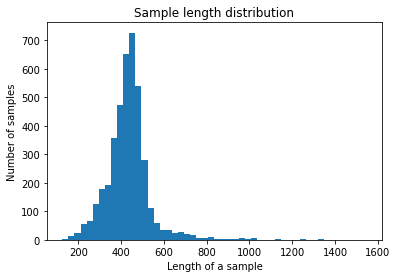

In [21]:
from explore_data import plot_sample_length_distribution

plot_sample_length_distribution(train['description'])

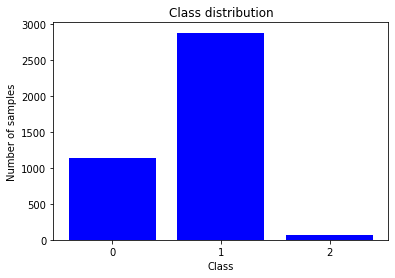

In [22]:
from explore_data import plot_class_distribution

plot_class_distribution(train['ratingCategory'])

### Define Pipeline Components

Pipeline Components for LinearSVC

In [31]:
vect = TfidfVectorizer(stop_words='english',
                      ngram_range=(1,2))
clf = LinearSVC()

pipe = Pipeline([('vect', vect), ('clf', clf)])

In [13]:
vect = TfidfVectorizer(stop_words='english',
                      ngram_range=(1,2))

clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect),
#                 Select K-Best
                 ('clf', clf)])

In [5]:
pipe

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.35, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [34]:
parameters = {
    'vect__max_df': (0.35, 0.75, 1.0),
    'vect__min_df': (2, 5, 10),
    'vect__max_features': (5000, 20000, None),
    'clf__penalty': ('l1','l2'),
    'clf__loss': ('hinge', 'squared_hinge'),
    'clf__C': (0.1, 0.5, 1., 2.),
    'clf__class_weight': ({0: 1., 1: 2.5, 2: 0.06},  'balanced')
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   27.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 10.0min
[Parallel(n_jobs=4)]: Done 4320 out of 4320 | elapsed: 10.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [37]:
grid_search.best_params_

{'clf__C': 0.5,
 'clf__class_weight': 'balanced',
 'clf__loss': 'hinge',
 'clf__penalty': 'l2',
 'vect__max_df': 0.35,
 'vect__max_features': None,
 'vect__min_df': 2}

In [35]:
grid_search.best_score_

0.7604597295250979

### Show most important features

In [ ]:
best_model = grid_search.best_estimator_
vect = best_model.named_steps['vect']
clf = best_model.named_steps['clf']

In [ ]:
eli5.show_weights(clf, vect=vect, top=20)

### Let's try RandomForestClassifier

In [16]:
parameters = {
    'vect__max_df': (0.35, 0.75),
    'vect__min_df': (2, 5),
    'vect__max_features': (5000, 20000, None),
    'clf__criterion': ('gini', 'entropy'),
    'clf__max_depth': (10, 15, 5),
    'clf__min_samples_split': (10, 15, ),
    'clf__min_samples_leaf': (2, 5, 7),
    'clf__min_impurity_decrease': (0.001, 0.01)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   46.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 12.1min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 15.1min
[Parallel(n_jobs=4)]: Done 4320 out of 4320 | elapsed: 16.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [17]:
grid_search.best_score_

0.7103015684431983

In [18]:
grid_search.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 15,
 'clf__min_impurity_decrease': 0.001,
 'clf__min_samples_leaf': 2,
 'clf__min_samples_split': 15,
 'vect__max_df': 0.35,
 'vect__max_features': 5000,
 'vect__min_df': 5}

### Show most important features

In [23]:
#  Extract the vectorizer and model from grid_search pipeline
best_model = grid_search.best_estimator_
vect = best_model.named_steps['vect']
clf = best_model.named_steps['clf']

In [24]:
eli5.show_weights(clf, vec=vect, top=20)

Weight,Feature
0.0210 ± 0.0962,hot
0.0208 ± 0.0963,chocolate
0.0198 ± 0.0974,bit
0.0191 ± 0.0856,like
0.0179 ± 0.0795,clean
0.0173 ± 0.0931,simple
0.0151 ± 0.0658,young
0.0126 ± 0.0567,spices
0.0126 ± 0.0562,mixer
0.0125 ± 0.0601,needs


In [36]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_required_parameters',
 '_run_search',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'refit_time_',
 'return_train_score',
 'score

### Make a Submission File
*Note:* In a typical Kaggle competition, you are only allowed two submissions a day, so you only submit if you feel you cannot achieve higher test accuracy. For this competition the max daily submissions are capped at **20**. Submit for each demo and for your assignment. 

In [21]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [39]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [40]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [15]:
subNumber = 0

In [41]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt9/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

You're trying to achieve a minimum of 80% Accuracy on your model.

## Latent Semantic Indexing (Learn)
<a id="p2"></a>

## Follow Along
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
4. Make a submission to Kaggle 


### Define Pipeline Components

In [176]:
# vectorizer
vect = TfidfVectorizer(stop_words='english',
                      ngram_range=(1,2),
                      min_df=2,
                      max_df=0.75)

# Singular Value Decomposition
svm = TruncatedSVD(algorithm='randomized')

# classifier
clf = LinearSVC(class_weight='balanced', penalty='l2', loss='hinge')

# LSA part
lsa = Pipeline([('vect', vect), ('svm', svm)])

# Combine into one pipeline
pipe = Pipeline([('lsa', lsa), ('clf', clf)])

### Define Your Search Space
You're looking for both the best hyperparameters of your vectorizer and your classification model. 

In [177]:
parameters = {
    'clf__C': (3., 4.),
    'lsa__vect__max_df': (0.75, 1.),
    'lsa__svm__n_components': (300, 350),
    'lsa__svm__n_iter': (15, 25)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=4, verbose=1)
grid_search.fit(train['description'], train['ratingCategory'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  3.9min finished
/Users/anastasialysenko/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('lsa',
                                        Pipeline(memory=None,
                                                 steps=[('vect',
                                                         TfidfVectorizer(analyzer='word',
                                                                         binary=False,
                                                                         decode_error='strict',
                                                                         dtype=<class 'numpy.float64'>,
                                                                         encoding='utf-8',
                                                                         input='content',
                                                                         lowercase=True,
                                                                         max_df=0.75,
            

In [178]:
grid_search.best_score_

0.7555706517673043

In [179]:
grid_search.best_params_

{'clf__C': 3.0,
 'lsa__svm__n_components': 350,
 'lsa__svm__n_iter': 15,
 'lsa__vect__max_df': 1.0}

In [185]:
#  Extract the vectorizer and model from grid_search pipeline
best_model = grid_search.best_estimator_
vect = best_model.named_steps['lsa']['vect']
clf = best_model.named_steps['clf']

In [186]:
eli5.show_weights(clf, vec=vect, top=20)

### Make a Submission File

In [187]:
# Predictions on test sample
pred = grid_search.predict(test['description'])

In [188]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [189]:
# Make Sure the Category is an Integer
submission.head()

,id,ratingCategory
0,3461,1
1,2604,1
2,3341,1
3,3764,1
4,2306,1


In [193]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./whiskey-reviews-dspt9/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

Continue to apply Latent Semantic Indexing (LSI) to various datasets. 

# Word Embeddings with Spacy (Learn)
<a id="p3"></a>

## Follow Along

In [1]:
# Apply to your Dataset

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import randint

param_dist = {
    
    'max_depth' : randint(3,10),
    'min_samples_leaf': randint(2,15)
}

In [ ]:
# Continue Word Embedding Work Here


### Make a Submission File

In [ ]:
# Predictions on test sample
pred = ...predict(test['description'])

In [ ]:
submission = pd.DataFrame({'id': test['id'], 'ratingCategory':pred})
submission['ratingCategory'] = submission['ratingCategory'].astype('int64')

In [ ]:
# Make Sure the Category is an Integer
submission.head()

In [ ]:
# Save your Submission File
# Best to Use an Integer or Timestamp for different versions of your model

submission.to_csv(f'./data/submission{subNumber}.csv', index=False)
subNumber += 1

## Challenge

What you should be doing now:
1. Join the Kaggle Competition
2. Download the data
3. Train a model & try: 
    - Creating a Text Extraction & Classification Pipeline
    - Tune the pipeline with a `GridSearchCV` or `RandomizedSearchCV`
    - Add some Latent Semantic Indexing (lsi) into your pipeline. *Note:* You can grid search a nested pipeline, but you have to use double underscores ie `lsi__svd__n_components`
    - Try to extract word embeddings with Spacy and use those embeddings as your features for a classification model.
4. Make a submission to Kaggle 

# Post Lecture Assignment
<a id="p4"></a>

Your primary assignment this afternoon is to achieve a minimum of 80% accuracy on the Kaggle competition. Once you have achieved 70% accuracy, please work on the following: 

1. Research "Sentiment Analysis". Provide answers in markdown to the following questions: 
    - What is "Sentiment Analysis"? 
    - Is Document Classification different than "Sentiment Analysis"? Provide evidence for your response
    - How do create labeled sentiment data? Are those labels really sentiment?
    - What are common applications of sentiment analysis?
2. Research our why word embeddings worked better for the lecture notebook than on the whiskey competition.
    - This [text classification documentation](https://developers.google.com/machine-learning/guides/text-classification/step-2-5) from Google might be of interest
    - Neural Networks are becoming more popular for document classification. Why is that the case?